# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

**Para la problemática planteada, la información o datos que creo que nos ayudarían a resolverla serían datos sobre la superficie de la propiedad, la ubicación, cantidad de ambientes, antigüedad de la contrucción, para que fines fue usada anteriormente, el estado en el que se encuentran. Todos estos son datos relevantes a la hora de tasar una propiedad**

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
propiedades_data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(propiedades_data.shape)
propiedades_data.head()

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Tenemos un dataset con 146660 instancias y 19 colunmas.

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
propiedades_data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [4]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
tipos_propiedad, counts_tipos = np.unique(propiedades_data.property_type, return_counts=True)
print(tipos_propiedad, counts_tipos)

['Casa' 'Casa de campo' 'Cochera' 'Departamento' 'Depósito'
 'Local comercial' 'Lote' 'Oficina' 'Otro' 'PH'] [ 21521    322    259 107326    265    325   1312    658    374  14298]


Text(0.5, 1.0, 'Histograma tipos de propiedades')

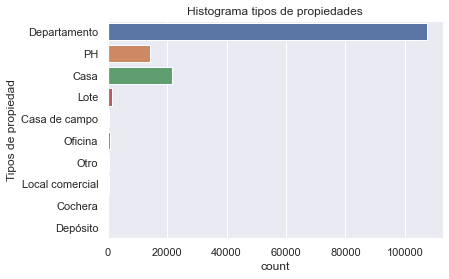

In [5]:
sns.countplot(data = propiedades_data, y = 'property_type')
plt.ylabel('Tipos de propiedad')
plt.title('Histograma tipos de propiedades')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [6]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
ubicaciones_2, counts_ubicaciones_2 = np.unique(propiedades_data.l2, return_counts=True)
print(ubicaciones_2, counts_ubicaciones_2)

['Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Oeste'
 'Bs.As. G.B.A. Zona Sur' 'Capital Federal'] [24282 12666 17173 92539]


En el output podemos ver una lista de las regiones seguidas de sus respectivas cantidades

Text(0.5, 1.0, 'Histograma por region')

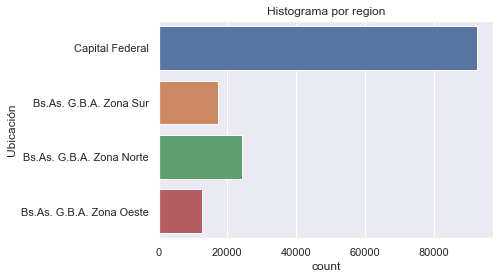

In [7]:
sns.countplot(data = propiedades_data, y = 'l2')
plt.ylabel('Ubicación')
plt.title('Histograma por region')

In [8]:
ubicaciones_3, counts_ubicaciones_3 = np.unique(propiedades_data.l3, return_counts=True)
print(ubicaciones_3, counts_ubicaciones_3)

['Abasto' 'Agronomía' 'Almagro' 'Almirante Brown' 'Avellaneda' 'Balvanera'
 'Barracas' 'Barrio Norte' 'Belgrano' 'Berazategui' 'Boca' 'Boedo'
 'Caballito' 'Catalinas' 'Cañuelas' 'Centro / Microcentro' 'Chacarita'
 'Coghlan' 'Colegiales' 'Congreso' 'Constitución' 'Escobar'
 'Esteban Echeverría' 'Ezeiza' 'Florencio Varela' 'Flores' 'Floresta'
 'General Rodríguez' 'General San Martín' 'Hurlingham' 'Ituzaingó'
 'José C Paz' 'La Matanza' 'La Plata' 'Lanús' 'Las Cañitas' 'Liniers'
 'Lomas de Zamora' 'Malvinas Argentinas' 'Marcos Paz' 'Mataderos' 'Merlo'
 'Monserrat' 'Monte Castro' 'Moreno' 'Morón' 'Nuñez' 'Once' 'Palermo'
 'Parque Avellaneda' 'Parque Centenario' 'Parque Chacabuco' 'Parque Chas'
 'Parque Patricios' 'Paternal' 'Pilar' 'Pompeya' 'Presidente Perón'
 'Puerto Madero' 'Quilmes' 'Recoleta' 'Retiro' 'Saavedra' 'San Cristobal'
 'San Fernando' 'San Isidro' 'San Miguel' 'San Nicolás' 'San Telmo'
 'San Vicente' 'Tigre' 'Tres de Febrero' 'Tribunales' 'Velez Sarsfield'
 'Versalles' 'Vicent

Como podemos ver en el output de la celda anterior, tenemos muchisimas categorías en la variable l3. A continuación voy a intentar agruparlas dentro de las categorias que tenemos en la variable l2, para que los gráficos sean más legibles y prolijos.

In [10]:
#primero creamos un filtro para cada zona en forma de lista, para que nos acepte dentro del argumento del metodo .isin
cap_fed = ['Capital Federal']
zon_sur = ['Bs.As. G.B.A. Zona Sur']
zon_oes = ['Bs.As. G.B.A. Zona Oeste']
zon_nor = ['Bs.As. G.B.A. Zona Norte']
#ahora vamos a crear 4 nuevos datasets filtrados
prop_capfed = propiedades_data[propiedades_data.l2.isin(cap_fed)]
prop_zonsur = propiedades_data[propiedades_data.l2.isin(zon_sur)]
prop_zonoes = propiedades_data[propiedades_data.l2.isin(zon_oes)]
prop_zonor = propiedades_data[propiedades_data.l2.isin(zon_nor)]

Text(0.5, 1.0, 'Histograma por localidad Zona Norte')

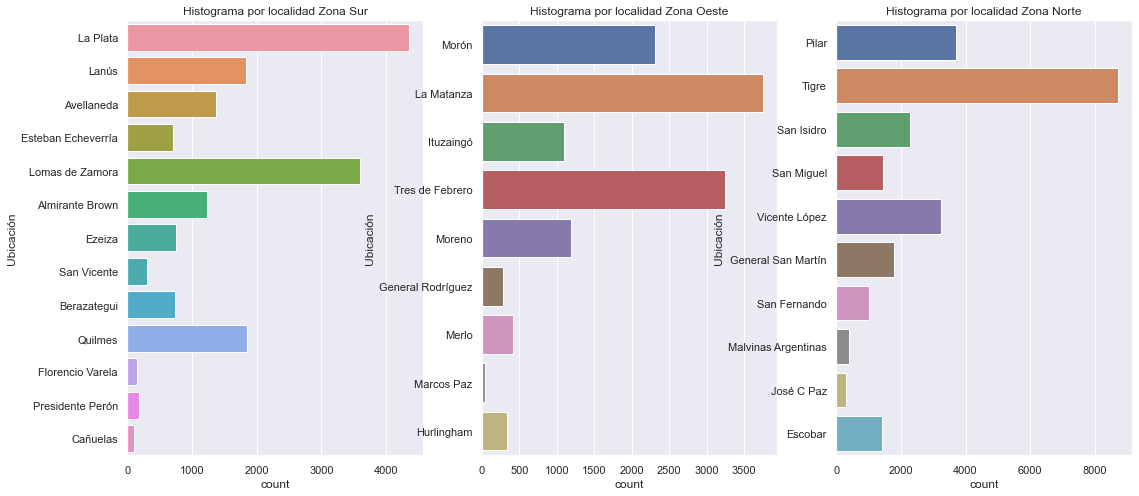

In [11]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.countplot(data = prop_zonsur, y = 'l3')
plt.ylabel('Ubicación')
plt.title('Histograma por localidad Zona Sur')
plt.subplot(1,3,2)
sns.countplot(data = prop_zonoes, y = 'l3')
plt.ylabel('Ubicación')
plt.title('Histograma por localidad Zona Oeste')
plt.subplot(1,3,3)
sns.countplot(data = prop_zonor, y = 'l3')
plt.ylabel('Ubicación')
plt.title('Histograma por localidad Zona Norte')

Text(0.5, 1.0, 'Histograma de propiedades por barrio Capital Federal')

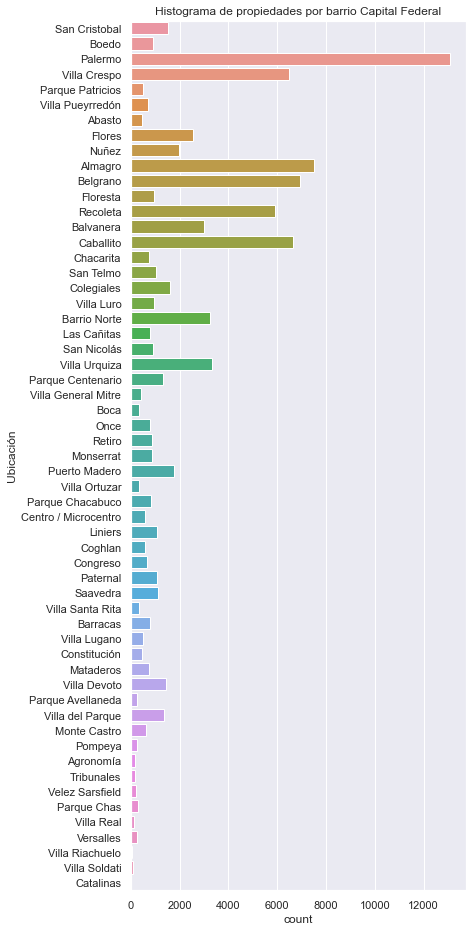

In [12]:
plt.figure(figsize=(6,16))
sns.countplot(data = prop_capfed, y = 'l3')
plt.ylabel('Ubicación')
plt.title('Histograma de propiedades por barrio Capital Federal')

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [13]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#AHORA VAMOS A FILTRAR EL DATASET
prop_data_filt = propiedades_data[(propiedades_data.property_type == 'Casa') | (propiedades_data.property_type == 'Departamento') | (propiedades_data.property_type == 'PH')]
prop_data_filt = prop_data_filt[prop_data_filt.l2 == 'Capital Federal']
new_index = np.arange(len(prop_data_filt.index))
prop_data_filt.index = new_index #aca estamos re indexando para poder hacer una iteración de ser necesario
print(prop_data_filt.shape)
prop_data_filt.head()

(91485, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [14]:
prop_data_filt.drop(columns=['lat','lon']).describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Con este método tenemos un pantallazo de la distribución de las variables

2.9642782969885775
1.3147042162697156
1.0
26.0


Text(0.5, 1.0, 'Histograma de la variable "rooms"')

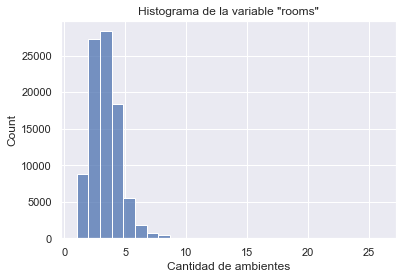

In [15]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#INVESTIGAMOS QUE VALORES TOMA LA VARIABLE ROOMS
print(prop_data_filt.rooms.mean())
print(prop_data_filt.rooms.std())
print(np.min(prop_data_filt.rooms))
print(np.max(prop_data_filt.rooms))
sns.histplot(x=prop_data_filt.rooms, bins=26)
plt.xlabel('Cantidad de ambientes')
plt.title('Histograma de la variable "rooms"')

**En este gráfico vemos claramente como la gran mayoría de las propiedades de este dataset tienen entre 1 y 5 ambientes**

1.960277641143357
1.0729463462652755
0.0
15.0


Text(0.5, 1.0, 'Histograma de la variable "bedrooms"')

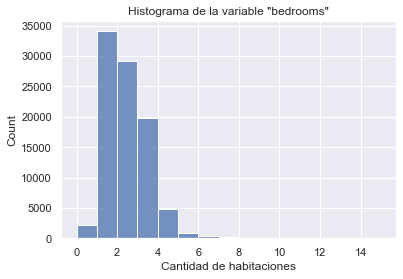

In [16]:
#INVESTIGAMOS QUE VALORES TOMA LA VARIABLE BEDROOMS
print(prop_data_filt.bedrooms.mean())
print(prop_data_filt.bedrooms.std())
print(np.min(prop_data_filt.bedrooms))
print(np.max(prop_data_filt.bedrooms))
sns.histplot(x=prop_data_filt.bedrooms, bins=15)
plt.xlabel('Cantidad de habitaciones')
plt.title('Histograma de la variable "bedrooms"')

**Este gráfico tiene mucho sentido si lo comparamos con el anterior. La gran mayoría de las propiedades tiene entre 1 y 5 ambientes, y tienen entre 1 y 4 habitaciones.**

1.5601473453210024
0.8603091110145454
1.0
14.0


Text(0.5, 1.0, 'Histograma de la variable "bathrooms"')

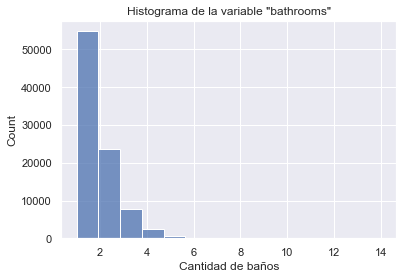

In [17]:
#MISMO PROCEDIMIENTO CON VARIABLE BATHROOMS
print(prop_data_filt.bathrooms.mean())
print(prop_data_filt.bathrooms.std())
print(np.min(prop_data_filt.bathrooms))
print(np.max(prop_data_filt.bathrooms))
sns.histplot(x=prop_data_filt.bathrooms, bins=14)
plt.xlabel('Cantidad de baños')
plt.title('Histograma de la variable "bathrooms"')

**Como vemos en la mayoría de las propiedades hay 1 solo baño, con una segunda minoría de propiedades que tienen entre 2 y 4 baños**

Antes de estudiar y filtrar las variables de superficie total y cubierta vamos a asegurarnos de darle sentido a esos valores y corregir los que tengan errores:

In [18]:
for n in np.arange(len(prop_data_filt.index)):
    if prop_data_filt.at[n,'surface_covered'] > prop_data_filt.at[n,'surface_total']:
        prop_data_filt.at[n,'surface_covered'] = prop_data_filt.at[n,'surface_total']
    else:
        None

In [19]:
print(prop_data_filt.surface_total.mean())
print(prop_data_filt.surface_total.std())
print(np.min(prop_data_filt.surface_total))
print(np.max(prop_data_filt.surface_total))

112.62636856893712
980.7136641827396
10.0
126062.0


Acá voy a filtrar sumándole una desviación estándar al promedio aproximadamente

Text(0.5, 1.0, 'Diagrama de cajas de la variable "surface_total"')

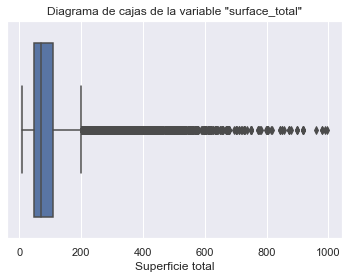

In [20]:
prop_data_filt = prop_data_filt[prop_data_filt.surface_total < 1000]
sns.boxplot(x=prop_data_filt.surface_total)
plt.xlabel('Superficie total')
plt.title('Diagrama de cajas de la variable "surface_total"')

**Con el dataset filtrado, podemos ver como el 75% de las propiedades está por debajo de los 200 m² (lo cual tiene mucho sentido considerando que hablamos de una urbe muy grande), pero tenemos una distribución pareja del 25% restante.**

In [21]:
print(prop_data_filt.surface_covered.mean())
print(prop_data_filt.surface_covered.std())
print(np.min(prop_data_filt.surface_covered))
print(np.max(prop_data_filt.surface_covered))

82.22190342469935
62.21152608750298
1.0
891.0


Text(0.5, 1.0, 'Diagrama de cajas de la variable "surface_covered"')

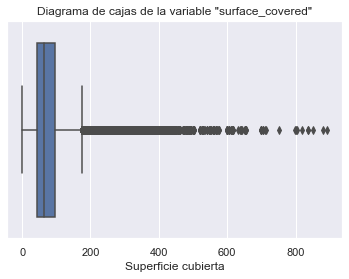

In [22]:
sns.boxplot(x=prop_data_filt.surface_covered)
plt.xlabel('Superficie cubierta')
plt.title('Diagrama de cajas de la variable "surface_covered"')

**Podemos ver que este gráfico es muy parecido al anterior, y eso tiene sentido, de hecho, si tuviera una distribución muy diferente a la de `surface_total` deberiamos estudiarla mejor para ver porque difieren tanto, considerando que son dependientes una de otra**

264979.8321443304
331677.20212664915
6000.0
32434232.0


Text(0.5, 1.0, 'Diagrama de cajas de la variable "price"')

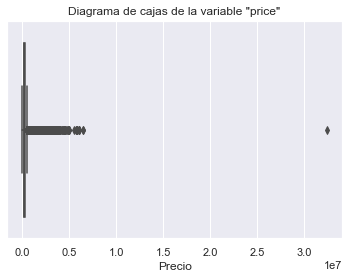

In [23]:
print(prop_data_filt.price.mean())
print(prop_data_filt.price.std())
print(np.min(prop_data_filt.price))
print(np.max(prop_data_filt.price))
sns.boxplot(x=prop_data_filt.price)
plt.xlabel('Precio')
plt.title('Diagrama de cajas de la variable "price"')

Con el precio podemos ver claramente un outlier que nos interfiere en el gráfico. Voy a filtrar esta vez el promedio más dos desviaciones estándar aproximadamente (hago esto porque si bien tenemos un outlier, los datos están dispersos)

Text(0.5, 1.0, 'Diagrama de cajas de la variable "price"')

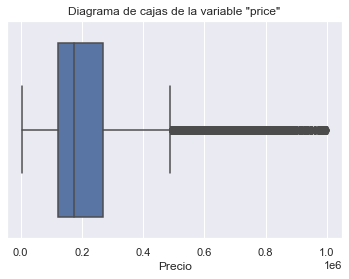

In [24]:
prop_data_filt = prop_data_filt[prop_data_filt.price < 1000000]
sns.boxplot(x=prop_data_filt.price)
plt.xlabel('Precio')
plt.title('Diagrama de cajas de la variable "price"')

**Con el dataset filtrado vemos como un 75% de las propiedades cuestan alrededor de 500000 dólares, con una distribución uniforme del 25% restante**

En orden de obtener el mejor gráfico posible y estudiar correctamente las relaciones de la pares, vamos a filtrar todas las instancias con valores de `surface_total`, `surface_covered` y `bathrooms` *nulos*

In [25]:
prop_data_filt.dropna(subset=['surface_covered','surface_total','bathrooms'], inplace=True)

Finalmente hacemos el `pairplot`:

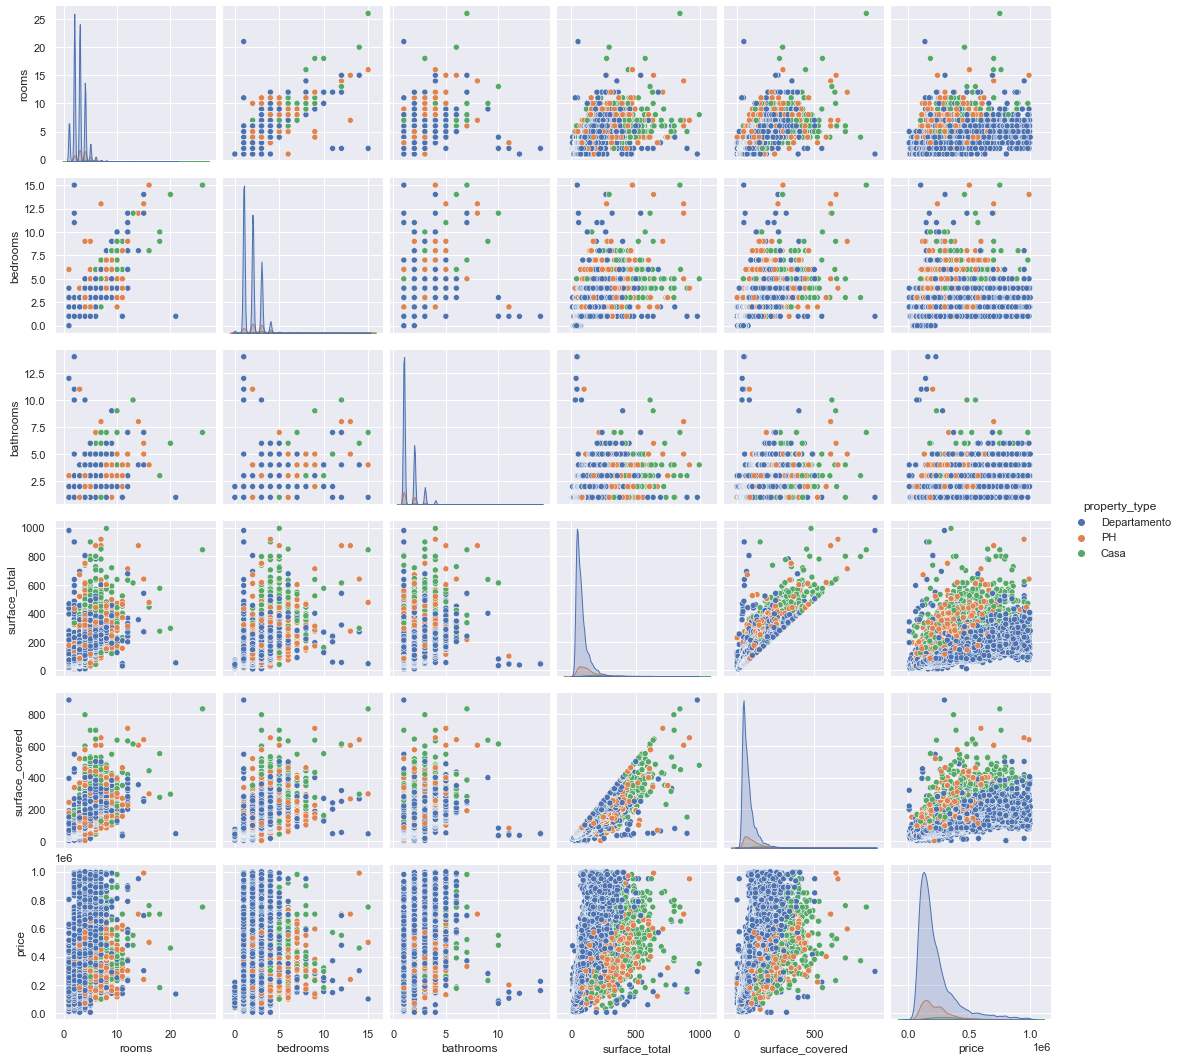

In [26]:
sns.pairplot(data=prop_data_filt.drop(columns=['lat','lon']), hue='property_type')

**Con el dataset filtrado podemos apreciar cómo se relacionan las variables entre si, y la distribución de cada una de ellas**

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [27]:
prop_data_filt.drop(labels=['lat','lon'], axis=1).corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.930248,0.587887,0.719205,0.773377,0.573343
bedrooms,0.930248,1.000000,0.592398,0.700487,0.751861,0.544671
bathrooms,0.587887,0.592398,1.000000,0.600210,0.655347,0.663744
surface_total,0.719205,0.700487,0.600210,1.000000,0.917664,0.676607
surface_covered,0.773377,0.751861,0.655347,0.917664,1.000000,0.737956
price,0.573343,0.544671,0.663744,0.676607,0.737956,1.000000


**Basandome en el cuadro de correlaciones, voy a graficar las que mas correlación tienen con el precio para ver el comportamiento segun el tipo de propiedad**

<AxesSubplot:title={'center':'Precio en función de la superficie total'}, xlabel='Superficie total', ylabel='Precio'>

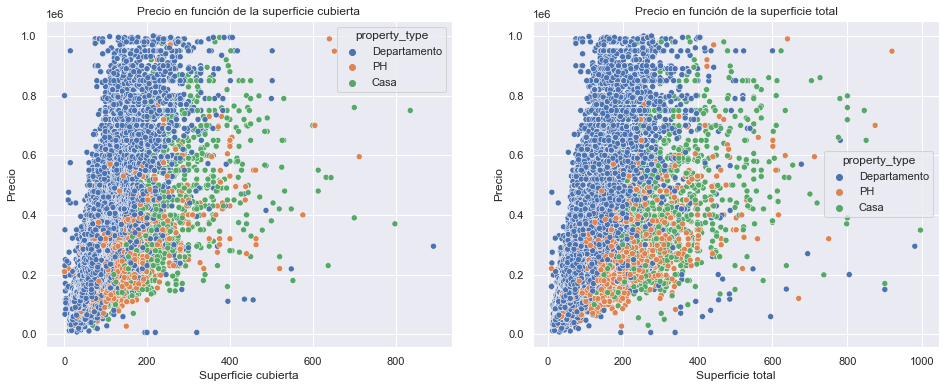

In [28]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.xlabel('Superficie cubierta')
plt.ylabel('Precio')
plt.title('Precio en función de la superficie cubierta')
sns.scatterplot(data=prop_data_filt, x='surface_covered', y='price', hue='property_type')
plt.subplot(1,2,2)
plt.xlabel('Superficie total')
plt.ylabel('Precio')
plt.title('Precio en función de la superficie total')
sns.scatterplot(data=prop_data_filt, x='surface_total', y='price', hue='property_type')

**Por ejemplo aquí arriba se ve la relación entre la superficie cubierta y el precio, y la superficie total y el precio. Se puede divisar en ambos gráficos una tendencia lineal, con una pendiente mayor para los departamentos.**

(-1.0, 7.0)

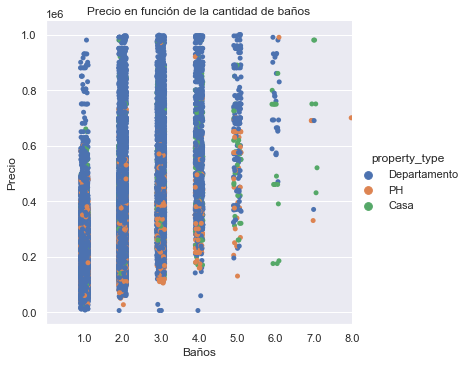

In [29]:
sns.catplot(data=prop_data_filt, x='bathrooms', y='price', hue='property_type')
plt.ylabel('Precio')
plt.xlabel('Baños')
plt.title('Precio en función de la cantidad de baños')
plt.xlim(-1,7)

**La cantidad de baños parece tener una clara influencia sobre el precio, porque vemos que no existen propiedades 'baratas' con mas de 2 baños**

(-1.0, 10.0)

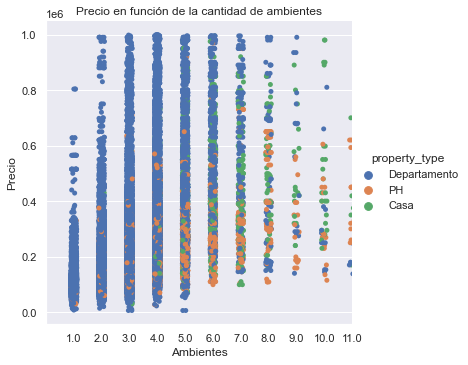

In [30]:
sns.catplot(data=prop_data_filt, x='rooms', y='price', hue='property_type')
plt.ylabel('Precio')
plt.xlabel('Ambientes')
plt.title('Precio en función de la cantidad de ambientes')
plt.xlim(-1, 10)

**En estos gráficos la tendencia lineal es un poco más dificil de ver, en parte porque la correlación es menor, y por otro lado porque son variables discretas, lo que si podemos visualizar es que existe una influencia de la cantidad de baños o habitaciones sobre el precio de las propiedades.**

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Vamos a reformular la pregunta: ¿Cómo varía la relación precio-superficie cubierta según el barrio? Ya vimos en el EDA que la superficie cubierta tiene una alta correlación con el precio. Ahora vamos a ver cómo es esa pendiente de esa relación 'lineal' para cada barrio.

Primero quiero ver que precios tenemos para cada barrio 

Text(0, 0.5, 'Barrios')

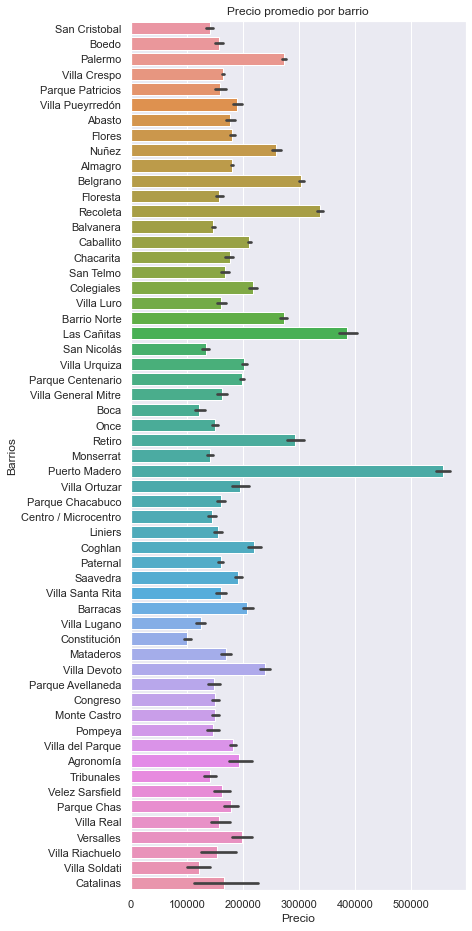

In [31]:
plt.figure(figsize=(6,16))
sns.barplot(data=prop_data_filt, x='price', y='l3')
plt.title('Precio promedio por barrio')
plt.xlabel('Precio')
plt.ylabel('Barrios')

A continuación, y basándome en el gráfico de barras anterior, voy a elegir algunos de los más caros y algunos de los más baratos, para ver cómo es la relación entre el precio y la superficie cubierta en cada uno de ellos.

<AxesSubplot:title={'center':'Barrios baratos'}, xlabel='Superficie cubierta', ylabel='Precio'>

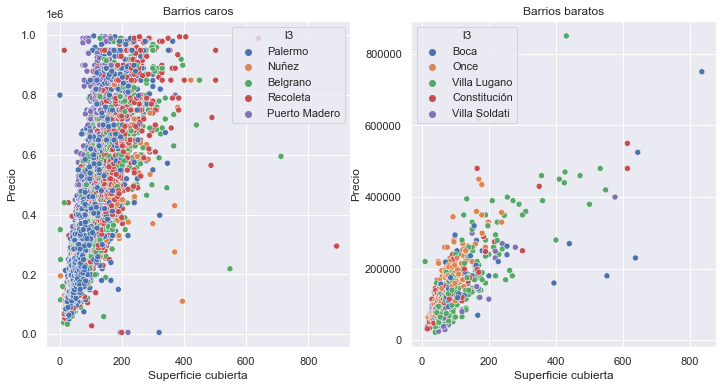

In [32]:
barrios = ['Puerto Madero','Recoleta','Belgrano','Nuñez','Palermo']
barrios_2 = ['Villa Soldati','Constitución','Villa Lugano','Boca','Once']
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Barrios caros')
plt.xlabel('Superficie cubierta')
plt.ylabel('Precio')
sns.scatterplot(data=prop_data_filt[prop_data_filt.l3.isin(barrios)], x='surface_covered', y='price', hue='l3')
plt.subplot(1,2,2)
plt.title('Barrios baratos')
plt.xlabel('Superficie cubierta')
plt.ylabel('Precio')
sns.scatterplot(data=prop_data_filt[prop_data_filt.l3.isin(barrios_2)], x='surface_covered', y='price', hue='l3')

Podemos ver claramente la diferencia en la relación que tiene una pendiente mucho mayor para los barrios caros, lo que implicaría que no es correcto usar la misma 'fórmula' para calcular el precio en los barrios caros que en los baratos.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [33]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data = data[(data.property_type == 'Casa') | (data.property_type == 'Departamento') | (data.property_type == 'PH')]
data = data[data.l2 == 'Capital Federal']
mask = (data.surface_total <= 1000) & (data.surface_total >= 15) & (data.price <= 4000000)
data = data[mask]
data = data.loc[:,['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
data.dropna(inplace=True)
print(data.shape)

(81019, 6)


**ELEGIMOS LAS VARIABLES**

Basandome en la correlación estudiada en el EDA, voy a elegir las variables `bathrooms`, `surface_total` y `surface_covered` para X. Elijo estas variables porque dada la correlación que existe entre `surface_covered` y `surface_total` (porque están muy relacionadas entre sí) no las podemos considerar como dos variables independientes. Lógicamente asignamos `price` para la variable y.

In [34]:
X = data[['bathrooms', 'surface_total', 'surface_covered']]
y = data.price

### TRAIN TEST SPLIT
Separo el dataset en conjuntos train y test para X e y, asignándole un 30% al conjunto test.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### MODELO BENCHMARK
* Creamos un modelo de regresión lineal para tomar como parámetro. Elijo este modelo porque me parece el más práctico para visualizar una relación lineal entre dos variables, y el más simple para tomar como ejemplo de comparación frente a los otros.

In [36]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

* Entrenamos el modelo con los datos train

In [37]:
linear_model.fit(X_train, y_train)

LinearRegression()

* Ahora predecimos sobre los datos test

In [38]:
y_test_pred = linear_model.predict(X_test)

* A continuación evalúo el error con dos métricas parecidas entre si, que promedian la suma de los errores para cada instancia

In [39]:
from sklearn.metrics import mean_squared_error
print('El RMSE para linear_model es', mean_squared_error(y_test, y_test_pred, squared=False), 'dólares')

El RMSE para linear_model es 206082.7122883812 dólares


In [40]:
from sklearn.metrics import mean_absolute_error
print('El MAE para linear_model es', mean_absolute_error(y_test, y_test_pred), 'dólares')

El MAE para linear_model es 95868.1065819657 dólares


* Luego elegí estas métricas que son muy prácticas porque nos dan un valor entre 0 y 1 que 'califica' el desempeño de nuestro modelo. A veces, es difícil evaluar el desempeño viendo un error promediado como con el MAE. La varianza explicada mide la proporción a la que el modelo explica la variación de los datos. El R2 (R cuadrado) determina la calidad del modelo para replicar los resultados

In [41]:
from sklearn.metrics import explained_variance_score
print('La varianza explicada para linear_model es', explained_variance_score(y_test, y_test_pred))

La varianza explicada para linear_model es 0.5352489933982542


In [42]:
from sklearn.metrics import r2_score
print('El factor R2 para linear_model es', r2_score(y_test, y_test_pred))

El factor R2 para linear_model es 0.5352430796844367


* Un breve gráfico para visualizar la dispersión de las predicciones respecto de su valor real

Text(0, 0.5, 'Predicciones de linear_model')

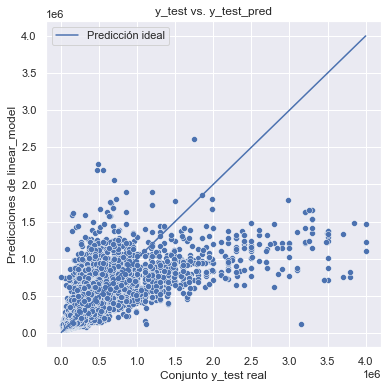

In [43]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, legend='brief', label='Predicción ideal')
plt.legend()
plt.title('y_test vs. y_test_pred')
plt.xlabel('Conjunto y_test real')
plt.ylabel('Predicciones de linear_model')

Podemos concluir que este modelo no es el mejor ni el mas preciso para predecir los precios de las propiedades, y tiene un desempeño regular. Vamos a intentar mejorar estas métricas en los modelos de vecinos cercanos y árboles de desición.

### ÁRBOL DE DECISIÓN Y KNN
En vez de elegir hiperparámetros arbitrariamente, usaré un método visto en clase. Voy a comenzar creando dos modelos regresores de cada uno, y probaré diferentes hiperparámetros para ver los desempeños de cada uno, comparando predicciones sobre los conjuntos `X_train` y `X_test`. Para eso vamos a usar `r2_score`

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

Primero empezamos con diferentes profundidades de árbol:

In [45]:
lista_r2_train = []
lista_r2_test = []

max_depths = [5,6,7,8,9,10,11,12,13,14,15]

for max_depth in max_depths:
    tree = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    
    y_test_pred = tree.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    
    lista_r2_train.append(train_r2)
    lista_r2_test.append(test_r2)
    

Text(0, 0.5, 'R2 score')

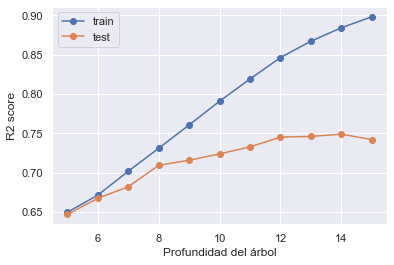

In [46]:
plt.plot(max_depths, lista_r2_train,'o-',label='train' )
plt.plot(max_depths, lista_r2_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('R2 score')

Repetimos el procedimiento para vecinos más cercanos:

In [47]:
lista_r2_train = []
lista_r2_test = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    
    knn = KNeighborsRegressor(n_neighbors= k)
  
    knn.fit(X_train, y_train)
  
    y_train_pred = knn.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    
    y_test_pred = knn.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    
    lista_r2_train.append(train_r2)
    lista_r2_test.append(test_r2)

Text(0, 0.5, 'R2 score')

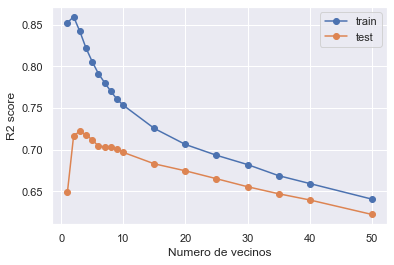

In [48]:
plt.plot(k_vecinos, lista_r2_train,'o-',label='train' )
plt.plot(k_vecinos, lista_r2_test,'o-',label='test')
plt.legend()
plt.title('')
plt.xlabel('Numero de vecinos')
plt.ylabel('R2 score')

Voy a crear un árbol con `max_depth = 8` y un modelo de vecinos cercanos con `n_neighbors = 8`. Elegí estos hiperparámetros basándome en los gráficos, tratando de elegir los que tuvieran un mejor desempeño sin caer en un overfitting.

In [49]:
tree_model = DecisionTreeRegressor(max_depth=8, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=8)

In [50]:
tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [51]:
y_pred_tree = tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

Ya creamos, entrenamos y predijimos sobre el conjunto `X_train`, ahora vamos a empezar a evaluar estos modelos. Antes de abordar la evaluación con las métricas que elegí, voy a hacer un simple gráfico valores reales vs. valores predichos.

Text(0, 0.5, 'Predicciones de knn_model')

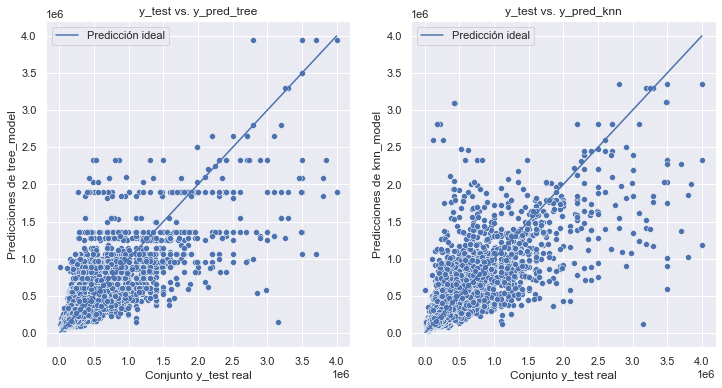

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_tree)
sns.lineplot(x=y_test, y=y_test, legend='brief', label='Predicción ideal')
plt.legend()
plt.title('y_test vs. y_pred_tree')
plt.xlabel('Conjunto y_test real')
plt.ylabel('Predicciones de tree_model')
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_knn)
sns.lineplot(x=y_test, y=y_test, legend='brief', label='Predicción ideal')
plt.legend()
plt.title('y_test vs. y_pred_knn')
plt.xlabel('Conjunto y_test real')
plt.ylabel('Predicciones de knn_model')

**Pequeño análisis de los gráficos:** podemos ver como en el modelo tree_model hay intervalos donde el modelo se equivoca con un factor más amplio que el modelo knn_model

Ahora sí, luego de ver estos gráficos vamos a usar las mismas métricas con las que evaluamos nuestro modelo *benchmark* para evaluar los modelos que creamos.

In [53]:
print('El RMSE para tree_model es', mean_squared_error(y_test, y_pred_tree, squared=False), 'dólares')
print('El RMSE para knn_model es', mean_squared_error(y_test, y_pred_knn, squared=False), 'dólares')

El RMSE para tree_model es 162967.5506450394 dólares
El RMSE para knn_model es 164646.9951459648 dólares


In [54]:
print('El MAE para tree_model es', mean_absolute_error(y_test, y_pred_tree), 'dólares')
print('El MAE para knn_model es', mean_absolute_error(y_test, y_pred_knn), 'doláres')

El MAE para tree_model es 74351.99189673911 dólares
El MAE para knn_model es 68787.39159569654 doláres


In [55]:
print('La varianza explicada para tree_model es', explained_variance_score(y_test, y_pred_tree))
print('La varianza explicada para knn_model es', explained_variance_score(y_test, y_pred_knn))

La varianza explicada para tree_model es 0.7093684830425813
La varianza explicada para knn_model es 0.703351622176063


In [56]:
print('El factor R2 para tree_model es', r2_score(y_test, y_pred_tree))
print('El factor R2 para knn_model es', r2_score(y_test, y_pred_knn))

El factor R2 para tree_model es 0.7093669371941786
El factor R2 para knn_model es 0.7033458963314978


## CONCLUSIONES

Si bien ambos modelos han tenido un desempeño similar, creo que para este caso particular, un modelo de vecinos más cercanos es la elección entre estos dos. Fue una decisión algo difícil, pero lo que la determinó fue que para una variable continua como lo es el precio, he observado un mejor desempeño en el gráfico valores reales vs. predichos. El árbol de decisión tiene un intervalo donde prácticamente no hay predicciones acertadas.
Podemos ver como efectivamente hemos logrado mejorar las métricas en comparación con linear_model. Sin embargo, un MAE de 74351 dólares para el árbol de decisión, y de 68787 dólares para el modelo de vecinos cercanos no es lo que esperaba de un modelo que prediga bien. Además, como se puede ver en los gráficos que comparan los valores reales con los predichos, hay una dispersión considerable de los datos. Creo que un MAE aceptable para un modelo sería de entre 5000 y 10000 dólares como máximo.
Creo que este error se debe a que **no tuvimos en cuenta la ubicación al calcular los precios** la ubicación de la propiedad es un factor clave a considerar al momento de la tasación, y esto podría explicar el desplazamiento de los datos al calcular los precios de las propiedades.
Además, si bien no fue usada para el entrenamiento de los modelos, la variable `bedrooms` no aportaba mucha información relevante a nuestro análisis.

En resumen, podemos decir que mejoramos el desempeño y las métricas en comparación con el modelo *benchmark*, pero que nuestros modelos distan aún de ser los ideales. El factor de la ubicación influye demasiado en el precio como para descartarlo. Sin embargo, logramos construir dos modelos que predijeron correctamente en un 70% de los casos.